In [140]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import folium

In [2]:
def clean_it(path):
    with open(path, 'r') as f:
        lst = f.readlines()
        out = []
        for i in lst:
            row = i[2:-1] # deleting all elements we don't need 
            out.append(row)
        clean_out = out[7:]
        clean_out2 = []
        for j in range(len(clean_out)):
            clean_out2.append(list(map(int, clean_out[j].split())))        
    return clean_out2

In [3]:
path_dist="C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw5"+"\\USA-road-d.CAL.gr"
path_time="C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw5"+"\\USA-road-t.CAL.gr"
path_cod= "C:\\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw5"+"\\USA-road-d.CAL.co"

In [5]:
data_dist=pd.DataFrame(list_dist)
data_dist.columns=["Node_a","Node_b","dist"]
data_dist.head()

,Node_a,Node_b,dist
0,1,1048577,456
1,1048577,1,456
2,2,1048578,2389
3,1048578,2,2389
4,3,1048579,358


In [71]:
data_time=pd.DataFrame(list_time)
data_time.columns=["Node_a","Node_b","dist"]
data_time.head()

,Node_a,Node_b,dist
0,1,1048577,1139
1,1048577,1,1139
2,2,1048578,5972
3,1048578,2,5972
4,3,1048579,895


In [73]:
data_cod=pd.DataFrame(list_cod)
data_cod.columns=["Node_a","latitude","longitude"]
data_cod.head()

,Node_a,latitude,longitude
0,1,-114315309,34133550
1,2,-114223946,34176221
2,3,-114307299,34148791
3,4,-114318765,34138889
4,5,-114347300,34042614


In [133]:
                       ########### Function to get the neighbouring nodes ##############

v=int(input("Please type the id of the node you want to start with: "))
metric=input("Please type the metric you prefer. The options are distance, time: ")
val=int(input("Please type the numerical value of the chosen metric: "))

# If the user choose spatial distance...

if (metric=="distance"):
    def recursive_function(v,val,the_list):
        df2 = data_dist[(data_dist.Node_a==v) & (data_dist.dist <= val) & (~data_dist.Node_b.isin(the_list))]
        df2['dist_left'] = val-df2['dist']
        the_list.extend(list(df2.Node_b))
        n = df2[['Node_b','dist_left']].shape[0]
        for i in range(n):
            recursive_function(df2.iloc[i,1],df2.iloc[i,3],the_list) #applying the search recursively
    def call_function(v,val):
        the_list=[]
        recursive_function(v,val,the_list)
        the_list=[v]+the_list
        neighbour=pd.DataFrame(the_list).reset_index(drop=True)
        neighbour.columns=['Neighbouring_nodes']
        return(neighbour) 
    
# If the user choose time...
elif(metric=="time"):
    def recursive_function(v,val,the_list):
        df2 = data_time[(data_time.Node_a==v) & (data_time.dist <= val) & (~data_time.Node_b.isin(the_list))]
        df2['dist_left'] = val-df2['dist']
        the_list.extend(list(df2.Node_b))
        n = df2[['Node_b','dist_left']].shape[0]
        for i in range(n):
            recursive_function(df2.iloc[i,1],df2.iloc[i,3],the_list) #applying the search recursively
    def call_function(v,val):
        the_list=[]
        recursive_function(v,val,the_list)
        the_list=[v]+the_list
        neighbour=pd.DataFrame(df2,the_list).reset_index(drop=True)
        neighbour.columns=['Neighbouring_nodes']
        return(neighbour) 
else: 
    print("Wrong option chosen")

# Check the code....

neighbour=call_function(v,val)
neighbour

Please type the id of the node you want to start with: 89674
Please type the metric you prefer. The options are distance, time: distance
Please type the numerical value of the chosen metric: 12563


C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Neighbouring_nodes
0,89674
1,1120641
2,89674
3,89671
4,1120642
...,...
58,89704
59,89755
60,1120666
61,89709


###  Visualization

In [134]:
# In order to visualize, first we construct the data set for the neighbouring nodes with all their longitudinal details 
# The details can be found from the dataset "data_cod"
neighbour.columns=["Node_a"]
neighbour=pd.merge(neighbour,data_dist,on="Node_a",how='inner')

In [135]:
neighbour=pd.merge(neighbour,data_cod,on="Node_a",how='inner')
neighbour

,Node_a,Node_b,dist,latitude,longitude
0,89674,1120641,1543,-124173986,41803934
1,89674,1120641,1543,-124173986,41803934
2,1120641,89674,1543,-124172672,41802950
3,1120641,89671,805,-124172672,41802950
4,1120641,1120642,304,-124172672,41802950
...,...,...,...,...,...
145,89709,89704,2159,-124171453,41794396
146,89709,1120669,1973,-124171453,41794396
147,89709,89711,914,-124171453,41794396
148,89711,89709,914,-124170350,41794372


In [130]:
# Building the graph
G=nx.from_pandas_edgelist(neighbour, 'Node_a', 'Node_b')

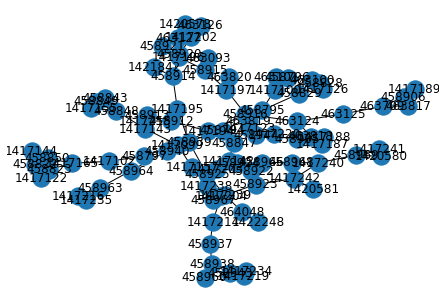

In [131]:
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [145]:
import decimal

In [146]:
map = folium.Map(location = [-124173986,41803934], zoom_start = 6)

In [123]:
print(neighbour[neighbour[‘Node_a’]=="v"].index.values)

SyntaxError: invalid character in identifier (<ipython-input-123-f524c9d9decc>, line 1)

In [150]:
coor = []
for node in neighbour["Node_a"]:
    
    longitude = str(data_cod.iloc[int(node)-1]['longitude'])
    longitude = decimal.Decimal(longitude[:2] + "." + longitude[2:])
    
    latitude = str(data_cod.iloc[int(node)-1]['latitude'])
    latitude = decimal.Decimal(latitude[:4] + "." + latitude[4:])
    
    folium.Marker([longitude, latitude]).add_to(map)
    coor.append((longitude, latitude))

In [151]:
folium.PolyLine(coor).add_to(map)

In [152]:
map